In [1]:

import scipy
import matplotlib.pyplot as plt
import numpy as np
# plt.ioff()
# plt.ion()


[3832 3950 4176 4325 4325 4750 4750 5028 5028 5250 5250 5500 5500 5950
 5950 6100 6100 6259 6259 6560 7130 7358]
[3.580359894797658, 3.5058577799662913, 3.36316728884859, 3.2690925845276286, 3.2690925845276286, 3.0007586963638104, 3.0007586963638104, 2.8252367648119474, 2.8252367648119474, 2.685071769112259, 2.685071769112259, 2.5272283054864833, 2.5272283054864833, 2.2431100709600873, 2.2431100709600873, 2.1484039927846217, 2.1484039927846217, 2.0480155499186283, 2.0480155499186283, 1.8579720197131948, 1.498088922646427, 1.3541356838197194]


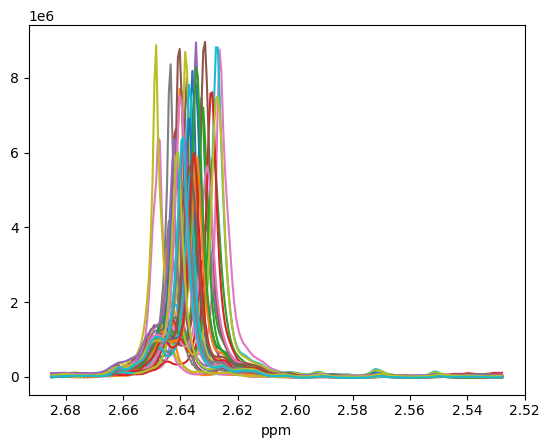

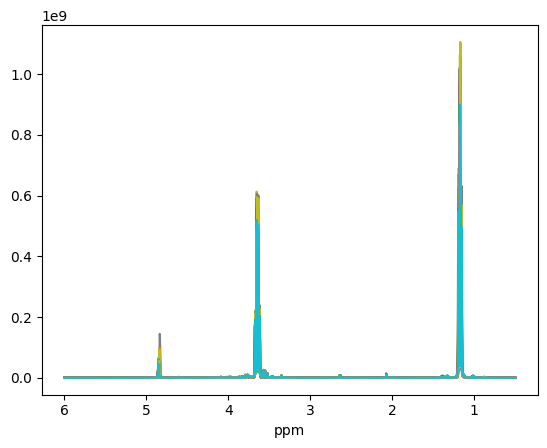

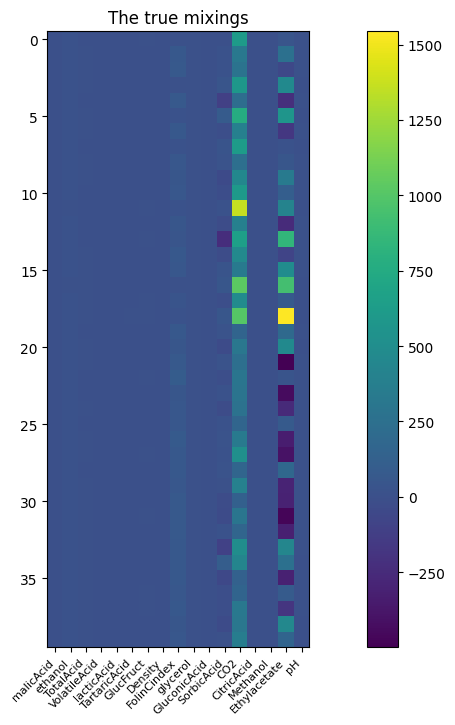

In [7]:
mat = scipy.io.loadmat('helpers/data/NMR_40wines.mat')
#Get X and Labels. Probably different for the other dataset, but i didn't check :)
X = mat.get('X')
Y = mat.get('Y')
#ppm is the scale of the x-axis.
ppm = mat.get('ppm')[0]
intervals = mat.get('wine_ints')[0]
print(intervals)
print([ppm[i] for i in intervals])
low_int = 10
high_int = 12
plt.plot(ppm[intervals[low_int]:intervals[high_int]], X[:,intervals[low_int]:intervals[high_int]].T)
plt.gca().invert_xaxis()
# plt.plot(X[:,intervals[low_int]:intervals[high_int]].T)
plt.xlabel("ppm") # Text for X-Axis
plt.ylabel("") # Text for Y-Axis
plt.show()


plt.plot(ppm,X.T)
plt.gca().invert_xaxis()
plt.xlabel("ppm") # Text for X-Axis
plt.ylabel("") # Text for Y-Axis
plt.show()

labels = mat.get('Label')
#40 wines times 8712 length spectrum
N, M = X.shape
#try to uncover mixings
label = [x[0] for x in labels[0]]

plt.figure(figsize=(15,8))
plt.imshow(Y)
plt.colorbar()
plt.title("The true mixings")

# Add xticks on the middle of the group bars
plt.xticks(range(len(label)), label, rotation=45,ha="right")
plt.tick_params(axis='x', which='major', labelsize=8)
plt.show()





epoch: 500, Loss: 0.09153741638851905, Tau: 79.674337148168365


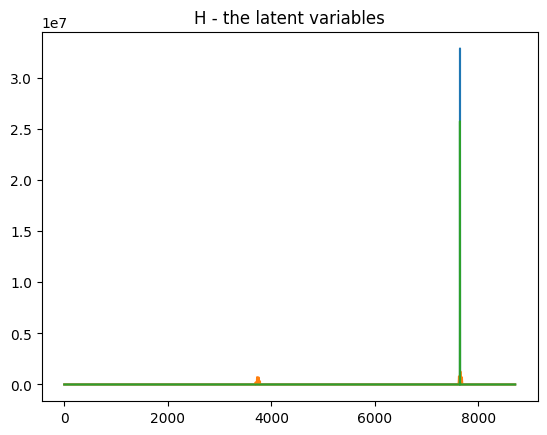

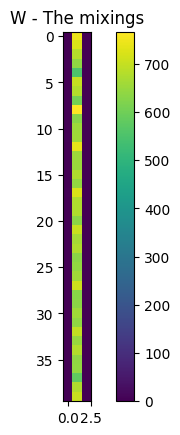

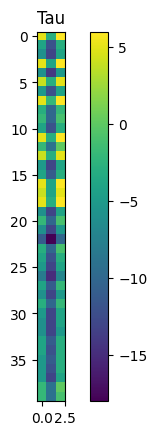

In [4]:
import scipy.io
import numpy as np
import pandas as pd
from shiftNMF_frozen import ShiftNMF

alpha = 1e-5
nmf = ShiftNMF(X, 3, lr=0.1, alpha = alpha, factor=1, patience=10)
W, H, tau = nmf.fit(verbose=True, max_iter=500)

plt.figure()
plt.plot(H.T)
plt.title("H - the latent variables")
plt.show()


plt.figure()
plt.imshow(W)
plt.colorbar()
plt.title("W - The mixings")
plt.show()

plt.figure()
plt.imshow(tau.real)
plt.colorbar()
plt.title("Tau")
plt.show()